In [1]:
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install gensim
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

     |████████████████████████████████| 10.3 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 45.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 32.7 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 32.1 MB/s eta 0:00:01��████████████████████▋          | 10.6 MB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 23.1 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 37.7 MB/s eta 0:00:01    |██████▌                         | 5.8 MB 37.7 MB/s eta 0:00:01��████████▏       | 21.5 MB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 63.3 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=5205c8e7af9e719c181e2c91b9354341efad967fc13a0e5a18d92e9168f65c99
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
     |████████████████████████████████| 1

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1]:
# Importing modules
import pandas as pd
import os
import glob
import csv

# path for original transript csv files
# path = '/home/jovyan/Transcripts/'
# path for speaker grouped transript csv files
path = '/home/jovyan/GroupedTranscripts/'

allfiles = glob.glob(path + "*.csv")

# get all 2019, 2020, 2021 csvs
year = "2019"
fileList = []
for file in allfiles:
    if(year in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList.append(df)
        
year1 = "2020"
fileList1 = []
for file in allfiles:
    if(year1 in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList1.append(df)
        
year2 = "2021"
fileList2 = []
for file in allfiles:
    if(year2 in file):
        df = pd.read_csv(file, header=None, sep='\n', quoting=csv.QUOTE_NONE, encoding='utf-8')
        fileList2.append(df)
        
papers = pd.concat(fileList, axis=0, ignore_index=True)
papers1 = pd.concat(fileList1, axis=0, ignore_index=True)
papers2 = pd.concat(fileList2, axis=0, ignore_index=True)

# Print head
papers.head()

,0
0,"CHAIRPERSON: Good morning Ms Molefe, good mor..."
1,ADV REFILOE MOLEFE: Good morning Chair. Ye...
2,MS MATHANE EVELINE MAKGATHO: Correct Chair. ...
3,MS MAHANE EVELINE MAKGATHO: Correct Chair.
4,CHAIRERSON: And you have been the one who h...


In [2]:
# Load the regular expression library
import re
# 2019
# Remove punctuation
papers['speech_processed'] = \
papers[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['speech_processed'] = \
papers['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['speech_processed'].head()

# 2020
# Remove punctuation
papers1['speech_processed'] = \
papers1[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers1['speech_processed'] = \
papers1['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers1['speech_processed'].head()

# 2021
# Remove punctuation
papers2['speech_processed'] = \
papers2[0].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers2['speech_processed'] = \
papers2['speech_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers2.head()
# print(papers.shape)

,0,speech_processed
0,CHAIRPERSON: Good morning Mr Pretorius. Goo...,chairperson: good morning mr pretorius good...
1,ADV PRETORIUS SC: Good morning Chair. [m...,adv pretorius sc: good morning chair [mi...
2,"MS K: Good morning. Yes, Chair I underst...",ms k: good morning yes chair i understan...
3,INQUIRY RESUMES:,inquiry resumes:
4,"COUNSEL: Thanks, Chair. Can we comfortably sit...",counsel: thanks chair can we comfortably sit d...


In [3]:
# remove emojis
# 2019
import re
papers = papers.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# papers.head()
# 2020
import re
papers1 = papers1.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
papers1.head()
# 2021
import re
papers2 = papers2.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# papers2.head()

In [4]:
papers['speech_processed'] = papers['speech_processed'].str.replace('\d+', '')
papers1['speech_processed'] = papers1['speech_processed'].str.replace('\d+', '')
papers2['speech_processed'] = papers2['speech_processed'].str.replace('\d+', '')
papers2.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,speech_processed
0,CHAIRPERSON: Good morning Mr Pretorius. Goo...,chairperson: good morning mr pretorius good...
1,ADV PRETORIUS SC: Good morning Chair. [m...,adv pretorius sc: good morning chair [mi...
2,"MS K: Good morning. Yes, Chair I underst...",ms k: good morning yes chair i understan...
3,INQUIRY RESUMES:,inquiry resumes:
4,"COUNSEL: Thanks, Chair. Can we comfortably sit...",counsel: thanks chair can we comfortably sit d...


In [5]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ja', 'oh', 'chairperson', 'chair', 'mr', 'ms', 'go', 'yes', 'no', 'say', 'know', 'see', 'one', 'neh','adv',
                   'intervenes', 'okay', 'resumes', 'adjourns', 'hm', 'said', 'saying', 'proceed', 'thank', 'good', 'morning',
                  'inquiry', 'thank', 'sc','correct', 'indistinct','intervention', 'van', 'der', 'help', 'page', 'think', 
                  'chairman', 'think', 'like', 'page', 'rise', 'court'])
papers['speech_processed'] = papers['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers['speech_processed'].head()

papers2['speech_processed'] = papers2['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers2['speech_processed'].head()

papers1['speech_processed'] = papers1['speech_processed'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
papers2['speech_processed'].head()

0    chairperson: pretorius everybody giving openin...
1    pretorius sc: [microphone muted] k hear us k c...
2    k: understand (suo) able confirm could please ...
3                                             resumes:
4    counsel: thanks comfortably sit avoided interr...
Name: speech_processed, dtype: object

Loading dataset...
done in 0.001s.
Extracting tf-idf features for NMF...
Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=25000 and n_features=5000...


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureW

done in 9.798s.


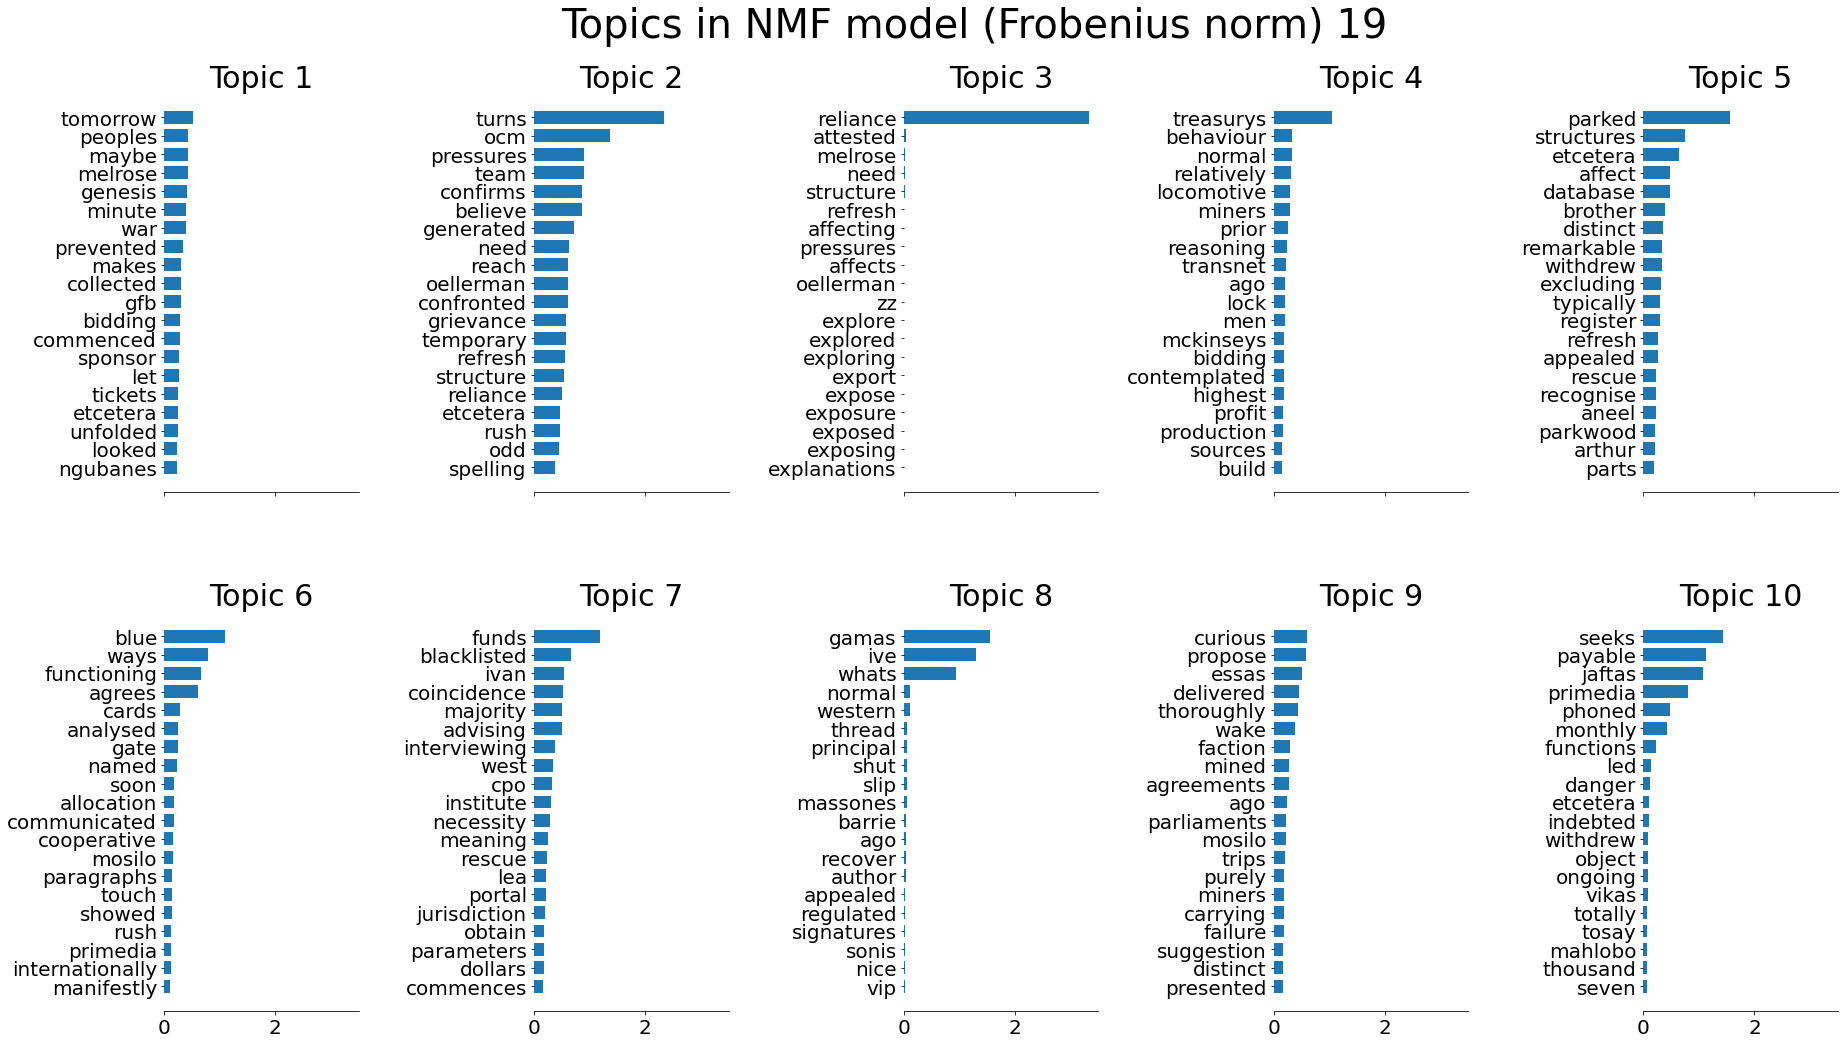

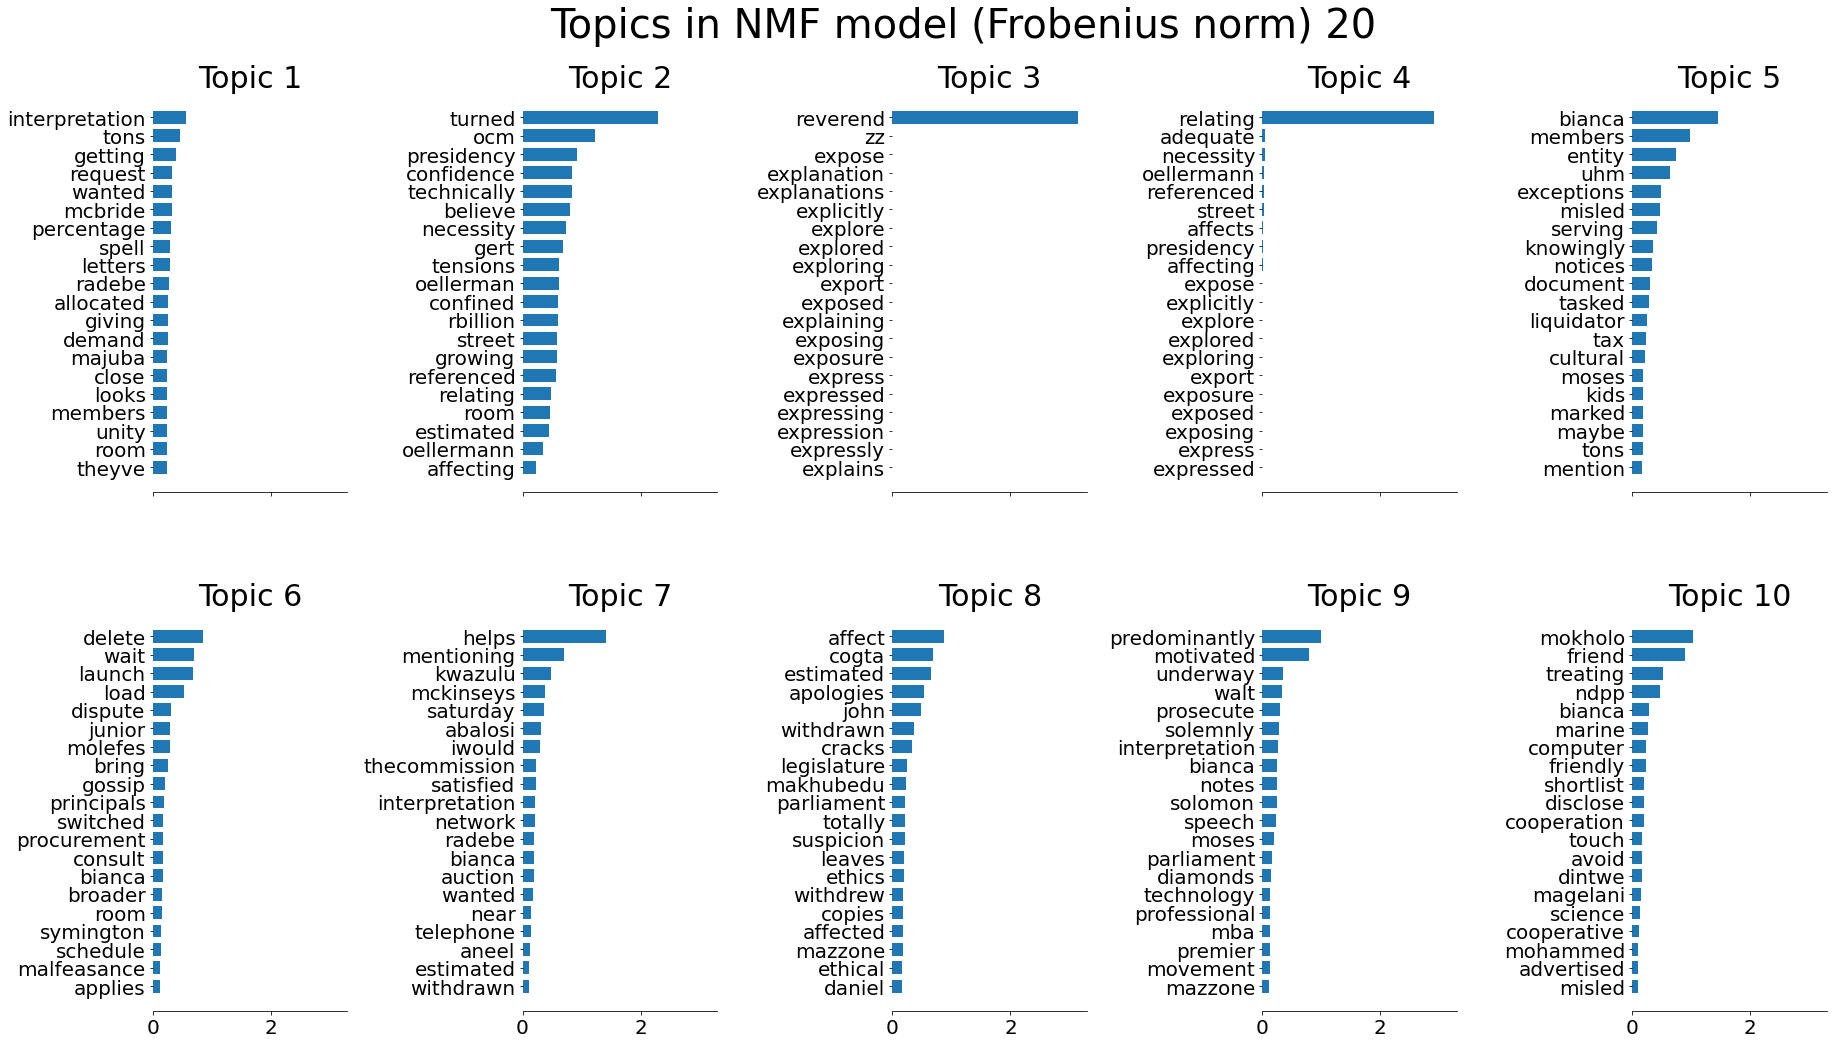

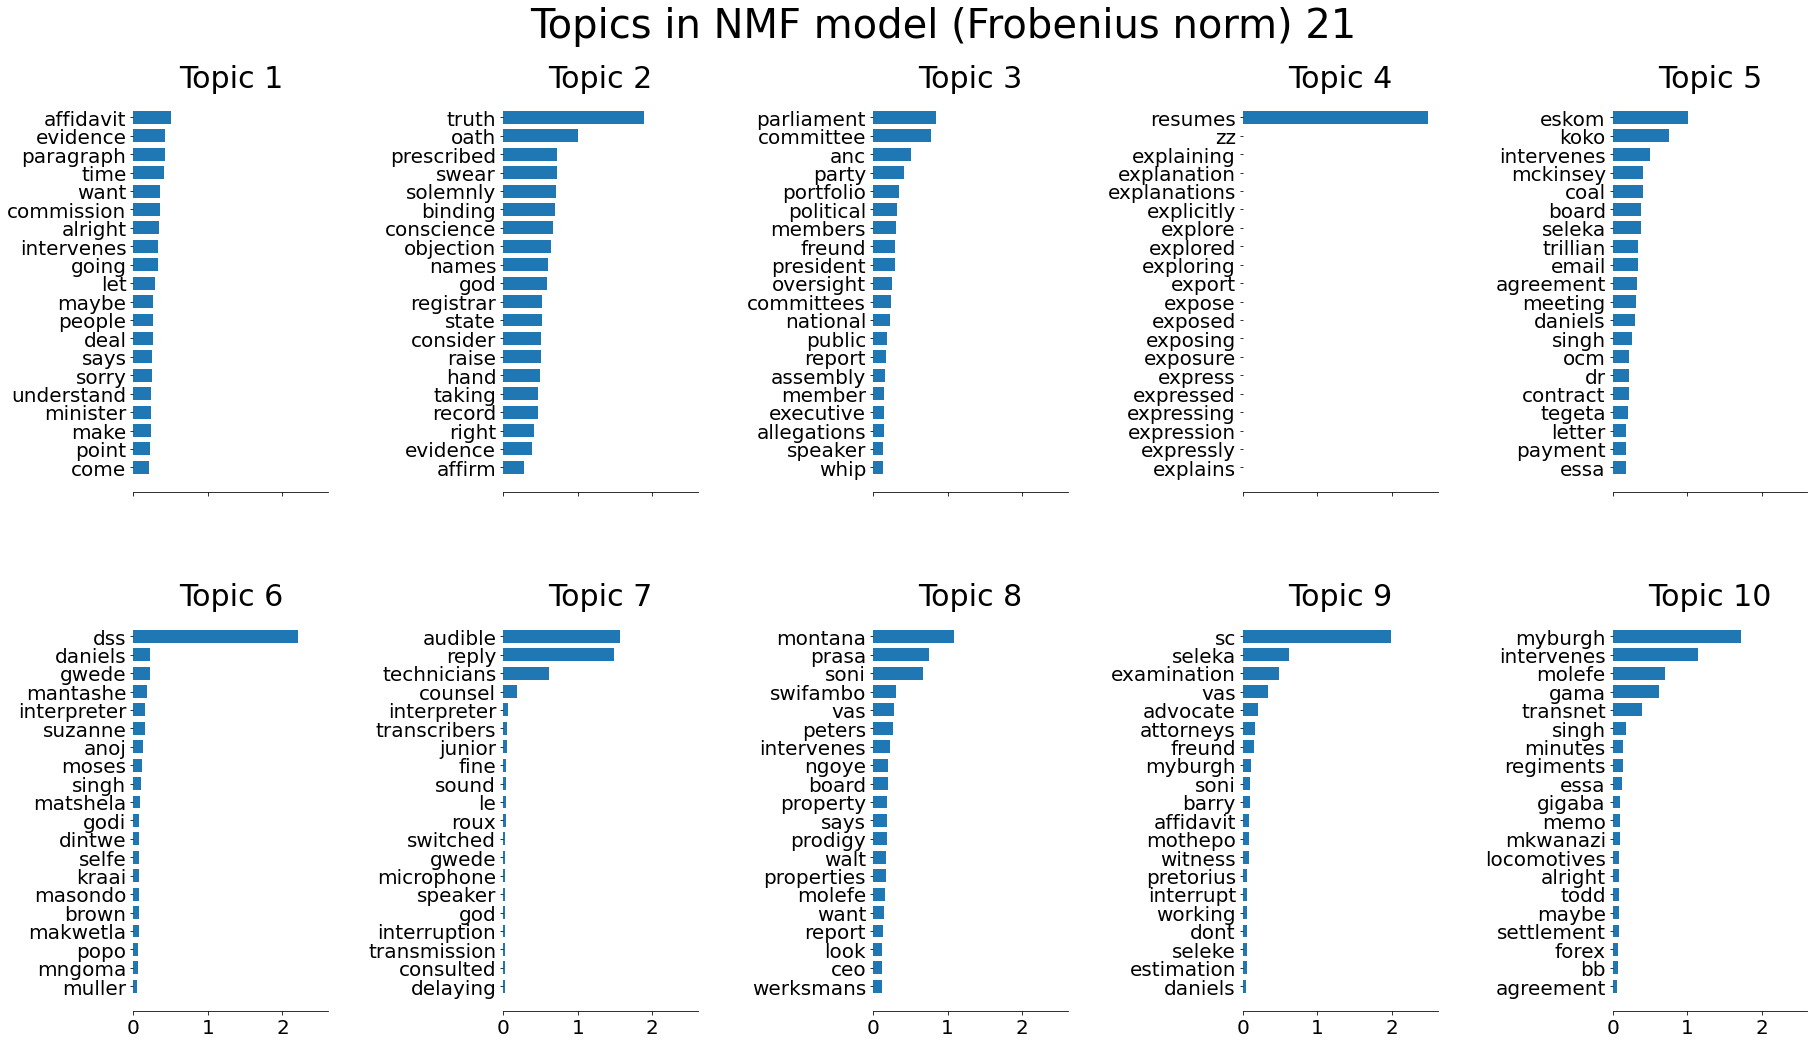



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=25000 and n_features=5000...
2019


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


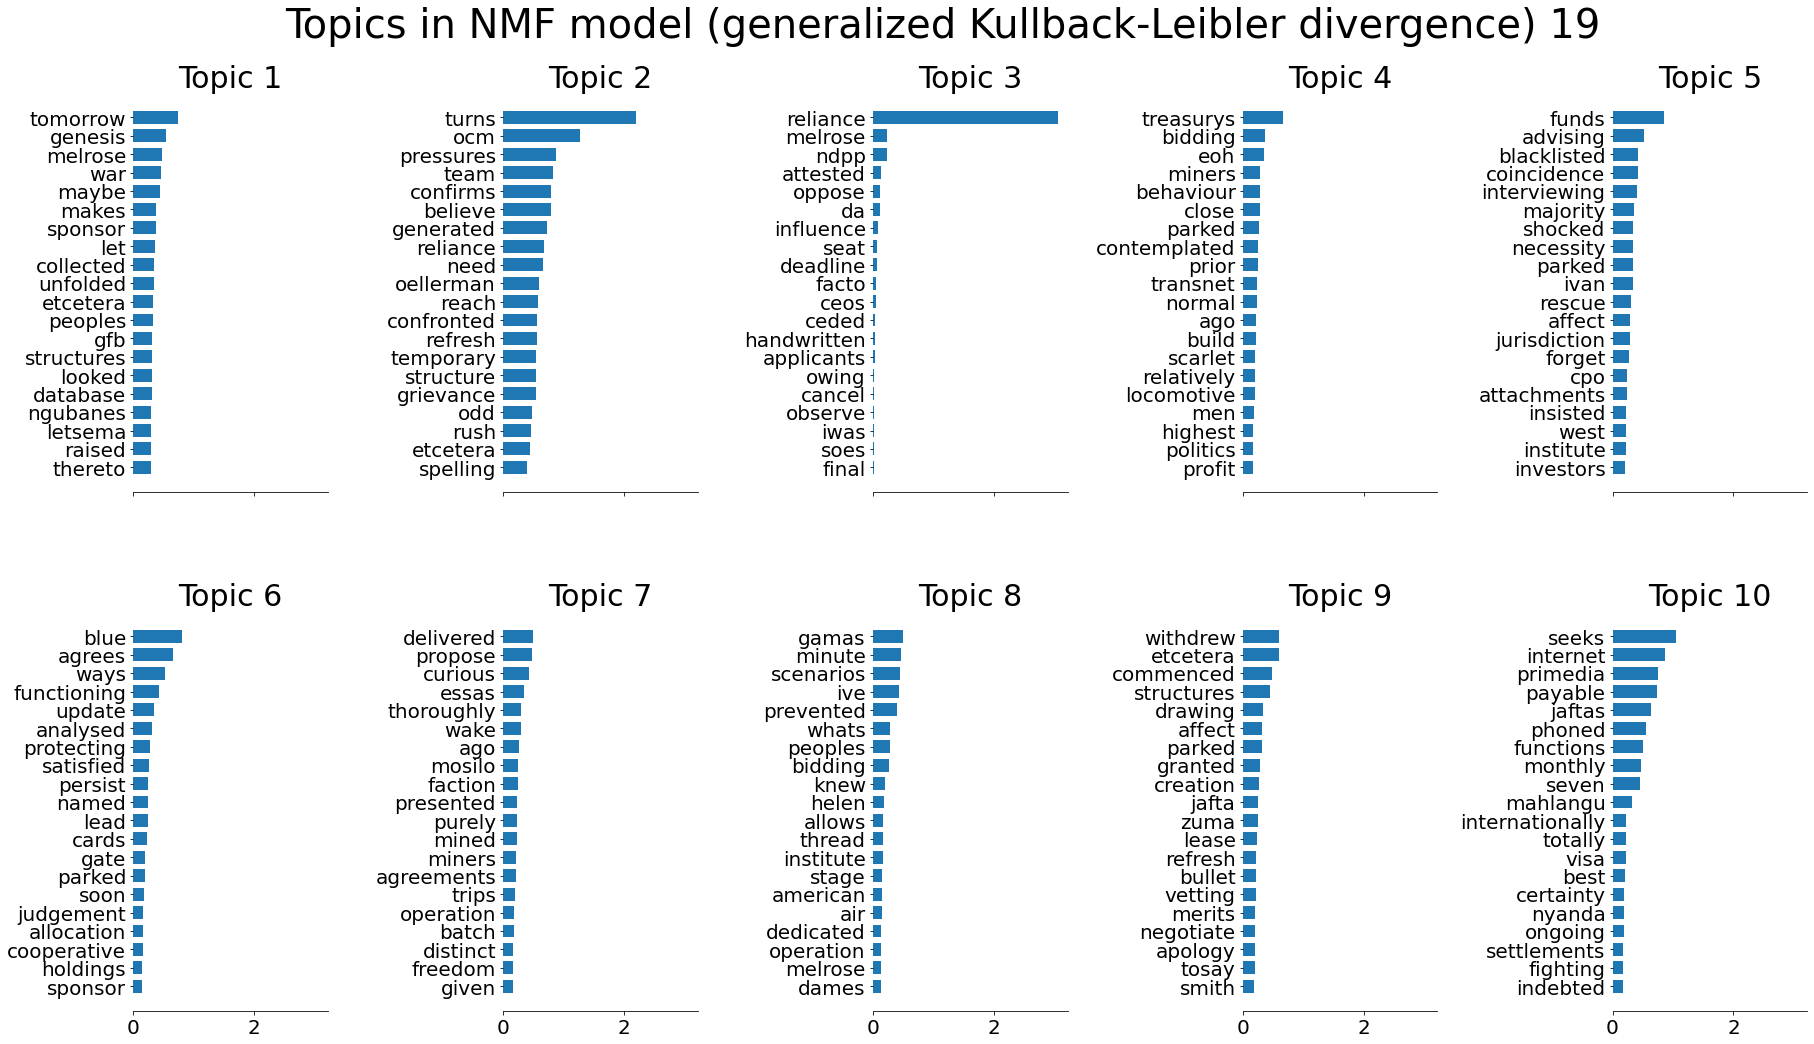

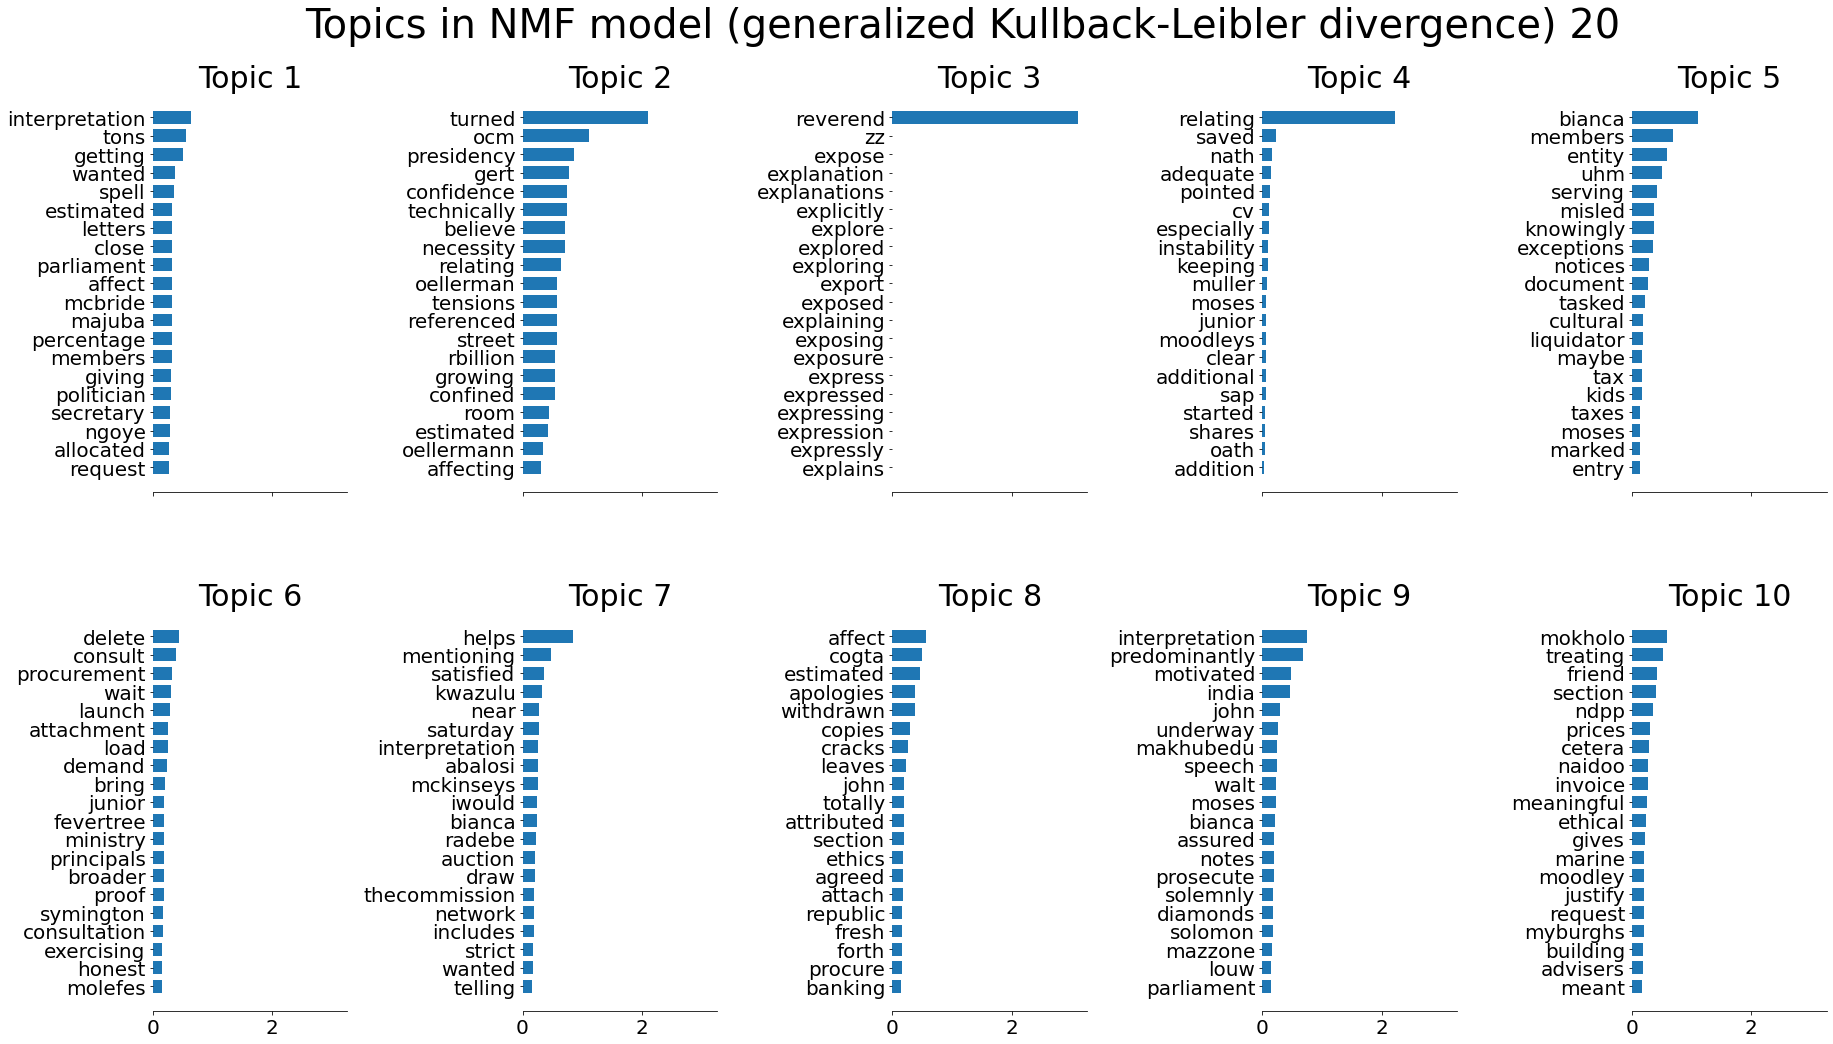

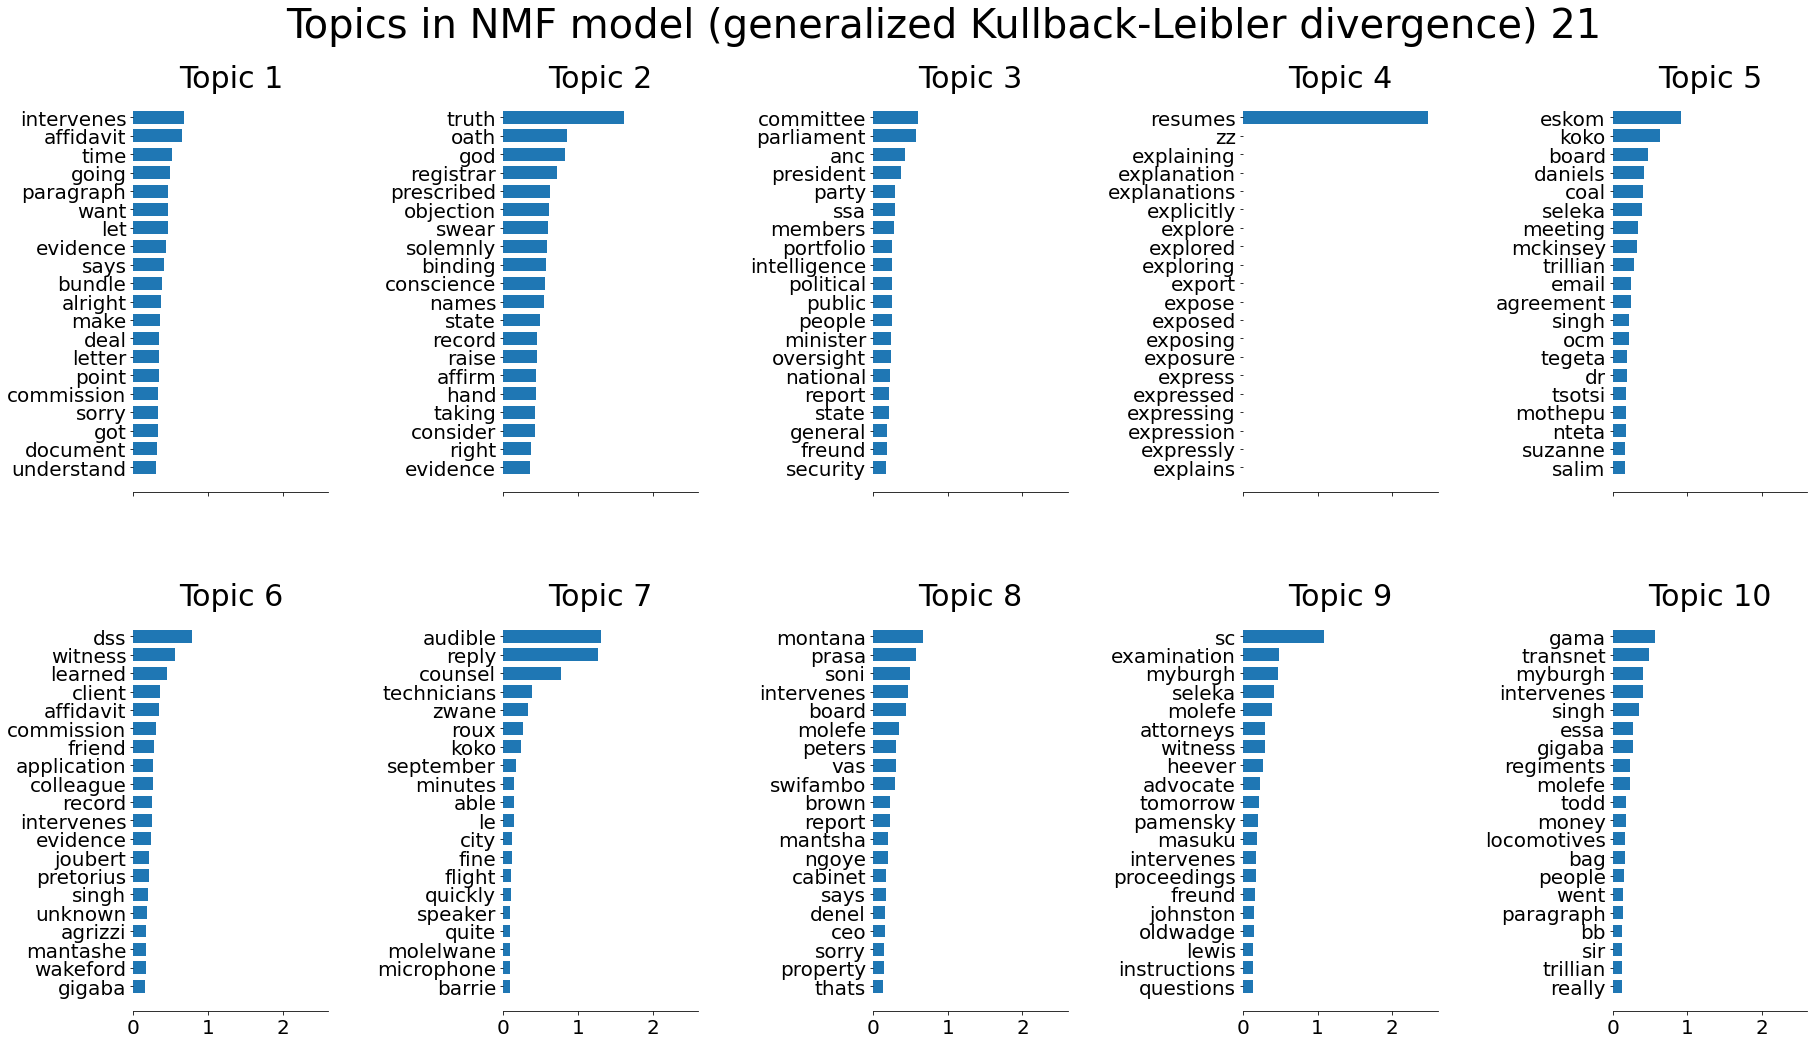



 Fitting LDA models with tf features, n_samples=25000 and n_features=5000...


NameError: name 'tf' is not defined

In [6]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

from numpy import *

n_samples = 25000
n_features = 5000
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    counter = 0
    topicsList = []
    topicWeightsSum = []
    actualWords = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        actualWords.append(top_features[0]) #save top 3 words in topic
        actualWords.append(top_features[1]) 
        actualWords.append(top_features[2])
        topTwoWeights = weights[0] + weights[1]#for year by year data
        # topThreeWeights = weights[0] + weights[1] + weights[2] #get weights of first 3 words
        # topicsList.append(topThreeWeights) #add to array - we wll divive with total to get graph
        topicsList.append(topTwoWeights) 
        weightsSum = sum(weights) #get total weights sum
        topicWeightsSum.append(weightsSum) #will be used in graph

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    # plot_bar_chart(actualWords, topicsList, topicWeightsSum)
    
    
def plot_time_series(actualWords, topicsList, topicWeightsSum):
    valArray = []
    
def plot_bar_chart(actualWords, topicsList, topicWeightsSum):
    graphVals = []
    count = 0
    for topic in topicsList:
        val = ((topicsList[count]/topicWeightsSum[count])*100)/100
        graphVals.append(val)
        count = count+1
    # print(graphVals)
    wordCounter = 0
    import numpy as np
    import matplotlib.pyplot as plt
#     for year by year data
    data = [('Topic1 \n'+actualWords[0]+ ',\n' + actualWords[1], graphVals[0]), 
            ('Topic2 \n'+actualWords[2]+ ',\n' + actualWords[3], graphVals[1]), 
            ('Topic3 \n'+actualWords[4]+ ',\n' + actualWords[5], graphVals[2]), 
            ('Topic4 \n'+actualWords[6]+ ',\n' + actualWords[7], graphVals[3]),
            ('Topic5 \n'+actualWords[8]+ ',\n' + actualWords[9], graphVals[4]),
            ('Topic6 \n'+actualWords[10]+ ',\n' + actualWords[11], graphVals[5]),
            ('Topic7 \n'+actualWords[12]+ ',\n' + actualWords[13], graphVals[6]),
            ('Topic8 \n'+actualWords[14]+ ',\n' + actualWords[15], graphVals[7]),
            ('Topic9 \n'+actualWords[16]+ ',\n' + actualWords[17], graphVals[8]),
            ('Topic10 \n'+actualWords[18]+ ',\n' + actualWords[19], graphVals[9])
           ]
    print("----> ",graphVals)

# Load the dataset and vectorize it.
print("Loading dataset...")
t0 = time()
data_samples = papers['speech_processed'][:n_samples]
data_samples1 = papers1['speech_processed'][:n_samples]
data_samples2 = papers2['speech_processed'][:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
# print("done in %0.3fs." % (time() - t0))
tfidf1 = tfidf_vectorizer.fit_transform(data_samples1)
tfidf2 = tfidf_vectorizer.fit_transform(data_samples2)

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
nmf1 = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf1)
nmf2 = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf2)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 19')

plot_top_words(nmf1, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 20')

plot_top_words(nmf2, tfidf_feature_names, n_top_words,
               'Topics in NMF model (Frobenius norm) 21')

# Fit the NMF model
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
print("2019")
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
# print("2020")
nmf1 = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf1)
# print("2021")
nmf2 = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf2)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 19')
plot_top_words(nmf1, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 20')
plot_top_words(nmf2, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence) 21')

print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda1 = lda.fit(tf)
lda2 = lda.fit(tf1)
lda3 = lda.fit(tf2)
print("done in %0.3fs." % (time() - t0))


In [50]:
zuma = data_samples.str.count("zuma").sum()
zuma1 = data_samples1.str.count("zuma").sum()
zuma2 = data_samples2.str.count("zuma").sum()
# print(zuma , zuma1)

eskom = data_samples.str.count("eskom").sum()
eskom1 = data_samples1.str.count("eskom").sum()
eskom2 = data_samples2.str.count("eskom").sum()
# print(eskom , eskom1)

transnet = data_samples.str.count("transnet").sum()
transnet1 = data_samples1.str.count("transnet").sum()
transnet2 = data_samples2.str.count("transnet").sum()
# print(transnet , transnet1)

bosasa = data_samples.str.count("bosasa").sum()
bosasa1 = data_samples1.str.count("bosasa").sum()
bosasa2 = data_samples2.str.count("bosasa").sum()
# print(bosasa , bosasa1)

agrizzi = data_samples.str.count("agrizzi").sum()
agrizzi1 = data_samples1.str.count("agrizzi").sum()
agrizzi2 = data_samples2.str.count("agrizzi").sum()
# print(agrizzi , agrizzi1)

corruption = data_samples.str.count("corruption").sum()
corruption1 = data_samples1.str.count("corruption").sum()
corruption2 = data_samples2.str.count("corruption").sum()
# print(corruption , corruption1)

anc = data_samples.str.count("anc").sum()
anc1 = data_samples1.str.count("anc").sum()
anc2 = data_samples2.str.count("anc").sum()

money = data_samples.str.count("money").sum()
money1 = data_samples1.str.count("money").sum()
money2 = data_samples2.str.count("money").sum()
# print(money , money1)
# data_samples = papers['message_processed']

from collections import Counter
results = Counter()
count19 = data_samples.str.lower().str.split().apply(results.update)
count20 = data_samples1.str.lower().str.split().apply(results.update)
count21 = data_samples2.str.lower().str.split().apply(results.update)
totalWords19 = len(count19)
totalWords20 = len(count20)
totalWords21 = len(count21)
print(totalWords19, totalWords20, totalWords21)

zuma19 = ((zuma/totalWords19))
zuma20 = ((zuma1/totalWords20))
zuma21 = ((zuma2/totalWords21))
print('zuma---> ', zuma19, zuma20, zuma21)

money19 = ((money/totalWords19))
money20 = ((money1/totalWords20))
money21 = ((money2/totalWords21))
print('money---> ', money19, money20, money21)

anc19 = ((anc/totalWords19)/2)
anc20 = ((anc1/totalWords20)/2)
anc21 = ((anc2/totalWords21)/2)
print('anc---> ', anc19, anc20, anc21)

bosasa19 = ((bosasa/totalWords19))
bosasa20 = ((bosasa1/totalWords20))
bosasa21 = ((bosasa2/totalWords21))
print('bosasa---> ', bosasa19, bosasa20, bosasa21)

agrizzi19 = ((agrizzi/totalWords19))
agrizzi20 = ((agrizzi1/totalWords20))
agrizzi21 = ((agrizzi2/totalWords21))
print('agrizzi---> ', agrizzi19, agrizzi20, agrizzi21)

corruption19 = ((corruption/totalWords19))
corruption20 = ((corruption1/totalWords20))
corruption21 = ((corruption2/totalWords21))
print('corruption---> ', corruption19, corruption20, corruption21)

eskom19 = ((eskom/totalWords19))
eskom20 = ((eskom1/totalWords20))
eskom21 = ((eskom2/totalWords21))
print('eskom---> ', eskom19, eskom20, eskom21)

transnet19 = ((transnet/totalWords19))
transnet20 = ((transnet1/totalWords20))
transnet21 = ((transnet2/totalWords21))
print('transnet---> ', transnet19, transnet20, transnet21)

1512 1201 927
zuma--->  0.6626984126984127 0.5695253955037469 0.5728155339805825
money--->  2.2023809523809526 1.9283930058284762 2.1175836030204964
anc--->  4.017195767195767 3.995836802664446 4.037756202804746
bosasa--->  1.210978835978836 0.5278934221482098 0.389428263214671
agrizzi--->  0.673941798941799 0.6253122398001665 0.23516720604099245
corruption--->  0.40145502645502645 0.38634471273938387 0.656957928802589
eskom--->  1.7705026455026456 1.9850124895920067 4.572815533980583
transnet--->  2.1984126984126986 1.4845961698584513 1.5911542610571736


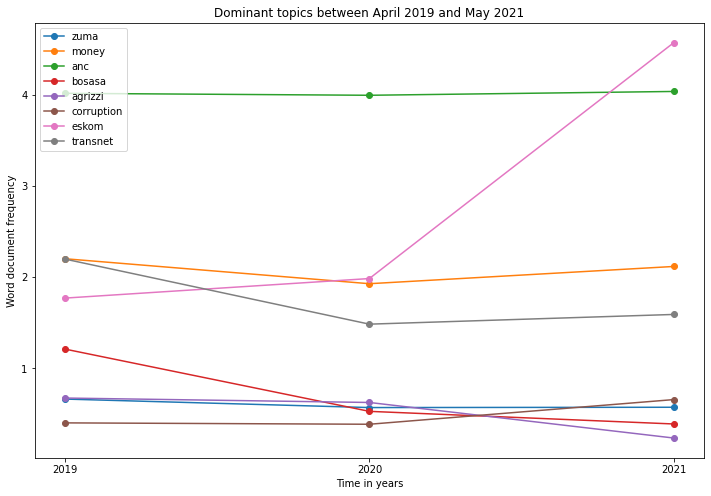

In [52]:
# 2019 data
# 2020 data
# 2021 data
# Import pyplot
import matplotlib.pyplot as plt
# Monthly average precipitation
boulder_monthly_precip = [
    (zuma19, money19, anc19, bosasa19, agrizzi19, corruption19, eskom19, transnet19), 
    (zuma20, money20, anc20, bosasa20, agrizzi20, corruption20, eskom20, transnet20),
    (zuma21, money21, anc21, bosasa21, agrizzi21, corruption21, eskom21, transnet21)
]

months = ["2019", "2020", "2021"]

# Define plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Set plot title and axes labels
ax.set(title = "Dominant topics between April 2019 and May 2021",
       xlabel = "Time in years",
       ylabel = "Word document frequency")

# Define x and y axes
ax.plot(months, boulder_monthly_precip, marker = 'o')

# Function add a legend
ax.legend(['zuma', 'money', 'anc', 'bosasa', 'agrizzi', 'corruption', 'eskom', 'transnet'])

# function to show the plot
plt.show()